# Malaria cell image

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2

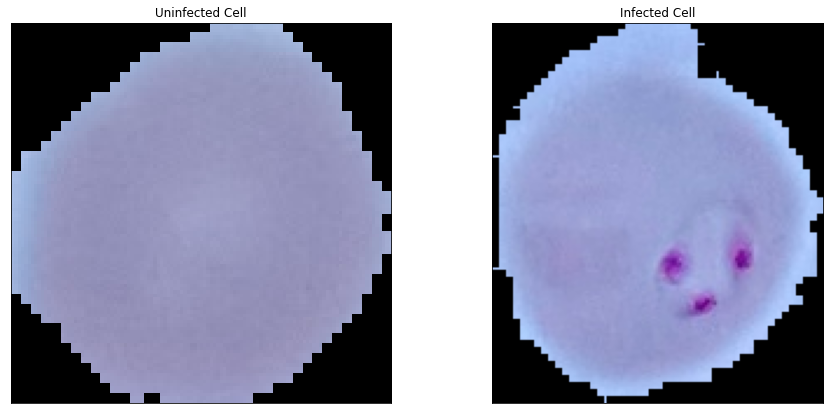

In [2]:
upic='cell_images/Uninfected/C1_thinF_IMG_20150604_104722_cell_9.png'
apic='cell_images/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_179.png'
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(cv2.imread(upic))
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(cv2.imread(apic))
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

### 이미지 전처리

In [3]:
width = 128
height = 128
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [9]:
trainDatagen = datagen.flow_from_directory(directory='cell_images',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='training')

Found 22048 images belonging to 2 classes.


In [10]:
valDatagen = datagen.flow_from_directory(directory='cell_images',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='validation')

Found 5510 images belonging to 2 classes.


### 모델링

In [11]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Dropout(0.3),
    
  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Dropout(0.3),
    
  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Dropout(0.3),
    
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)       

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(trainDatagen, epochs=5, batch_size=1000, validation_data=valDatagen)

Epoch 1/5
1378/1378 [==============================] - 206s 149ms/step - loss: 0.5207 - accuracy: 0.7113 - val_loss: 0.1945 - val_accuracy: 0.9285
Epoch 2/5
1378/1378 [==============================] - 190s 138ms/step - loss: 0.1786 - accuracy: 0.9408 - val_loss: 0.1584 - val_accuracy: 0.9434
Epoch 3/5
1378/1378 [==============================] - 190s 138ms/step - loss: 0.1618 - accuracy: 0.9494 - val_loss: 0.1788 - val_accuracy: 0.9290
Epoch 4/5
1378/1378 [==============================] - 179s 130ms/step - loss: 0.1465 - accuracy: 0.9557 - val_loss: 0.1700 - val_accuracy: 0.9468
Epoch 5/5
1378/1378 [==============================] - 179s 130ms/step - loss: 0.1361 - accuracy: 0.9591 - val_loss: 0.1851 - val_accuracy: 0.9412


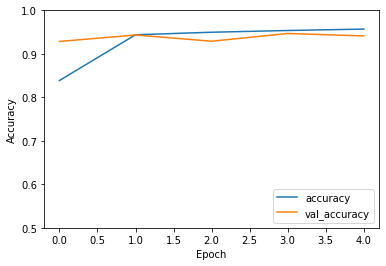

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')